<a href="https://colab.research.google.com/github/dellaanima/Aiffel_Repository/blob/master/Quest01/Quest01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (1) 데이터 가져오기

from sklearn.datasets import load_diabetes
import pandas as pd

# 데이터 불러오기
diabetes = load_diabetes()

# 데이터프레임 생성
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

# 결과 확인
print(df_X.head())
print(df_y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [ ]:
#(2) 모델에 입력할 데이터 X 준비하기

import numpy as np

# df_X의 값을 NumPy 배열로 변환
X = df_X.values

# 결과 확인
print(X)


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [ ]:
# (3) 모델에 예측할 데이터 y 준비하기

# df_y의 값을 NumPy 배열로 변환
y = df_y.target

# 결과 확인
print(y)


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print("Train 데이터 - X shape:", X_train.shape)
print("Train 데이터 - y shape:", y_train.shape)
print("Test 데이터 - X shape:", X_test.shape)
print("Test 데이터 - y shape:", y_test.shape)


Train 데이터 - X shape: (353, 10)
Train 데이터 - y shape: (353,)
Test 데이터 - X shape: (89, 10)
Test 데이터 - y shape: (89,)


In [ ]:
# (5) 모델 준비하기

import numpy as np
W = np.random.rand(10) #weight 갯수 = featrue 갯수 = X 의 Column 갯수
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


In [ ]:
# (6) 손실함수 loss 정의하기

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L



In [ ]:
# (7) 기울기를 구하는 gradient 함수 구현하기

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
# \(8) 하이퍼 파라미터인 학습률 설정하기
#(9) 모델 학습하기

LEARNING_RATES = [0.1, 0.01, 0.001, 0.0001, 0.00001]
best_loss = float('inf')
best_learning_rate = None
best_W = None
best_b = None

for learning_rate in LEARNING_RATES:
    W = np.random.randn(10)
    b = np.random.randn()
    losses = []

    for i in range(1, 10001):
        dW, db = gradient(X_train, W, b, y_train)
        W -= learning_rate * dW
        b -= learning_rate * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        if i % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))

    if losses[-1] < best_loss:
        best_loss = losses[-1]
        best_learning_rate = learning_rate
        best_W = W
        best_b = b

print('Best Learning Rate:', best_learning_rate)
print('Best Loss:', best_loss)
print('Best W:', best_W)
print('Best b:', best_b)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Iteration 60 : Loss 5644.4745
Iteration 70 : Loss 5578.9913
Iteration 80 : Loss 5515.5144
Iteration 90 : Loss 5453.9762
Iteration 100 : Loss 5394.3111
Iteration 110 : Loss 5336.4559
Iteration 120 : Loss 5280.3497
Iteration 130 : Loss 5225.9336
Iteration 140 : Loss 5173.1507
Iteration 150 : Loss 5121.9464
Iteration 160 : Loss 5072.2675
Iteration 170 : Loss 5024.0632
Iteration 180 : Loss 4977.2840
Iteration 190 : Loss 4931.8825
Iteration 200 : Loss 4887.8126
Iteration 210 : Loss 4845.0301
Iteration 220 : Loss 4803.4921
Iteration 230 : Loss 4763.1574
Iteration 240 : Loss 4723.9861
Iteration 250 : Loss 4685.9397
Iteration 260 : Loss 4648.9811
Iteration 270 : Loss 4613.0743
Iteration 280 : Loss 4578.1848
Iteration 290 : Loss 4544.2791
Iteration 300 : Loss 4511.3250
Iteration 310 : Loss 4479.2913
Iteration 320 : Loss 4448.1480
Iteration 330 : Loss 4417.8660
Iteration 340 : Loss 4388.4172
Iteration 350 : Loss 4359.7746
Iteration 360 : Loss 4331.9121
Iterati

In [ ]:
# (10) test 데이터에 대한 성능 확인하기

prediction = model(X_test, best_W, best_b)
mse = loss(X_test, best_W, best_b, y_test)
mse

2880.1107885876354

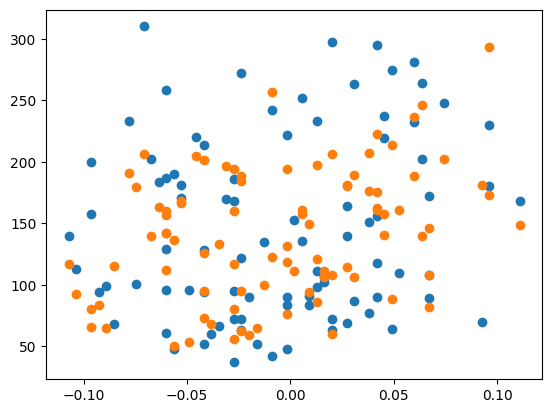

In [ ]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()